# Buy or Sell
Testing known methods on Microsoft, Apple and HP Stockprice to see if they work

# Imports

In [1]:
#import math
import pandas as pd
import numpy as np

import pandas_datareader as web

#plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

print("Import successful")

#if you dont like the warnings
# import warnings
# warnings.filterwarnings("ignore")

Import successful


# Data

Microsoft

In [2]:
dfMS=web.DataReader("MS", data_source="yahoo", start="2010-01-01", end = "2020-09-01")
dfMS.drop(["High", "Low", "Open", "Volume", "Adj Close"], axis=1, inplace=True)
dfMS

,Close
Date,
2010-01-04,30.910000
2010-01-05,32.040001
2010-01-06,32.450001
2010-01-07,32.919998
2010-01-08,32.250000
...,...
2020-08-26,51.709999
2020-08-27,52.610001
2020-08-28,52.889999


Text(0, 0.5, 'Close Prtice USD ($)')

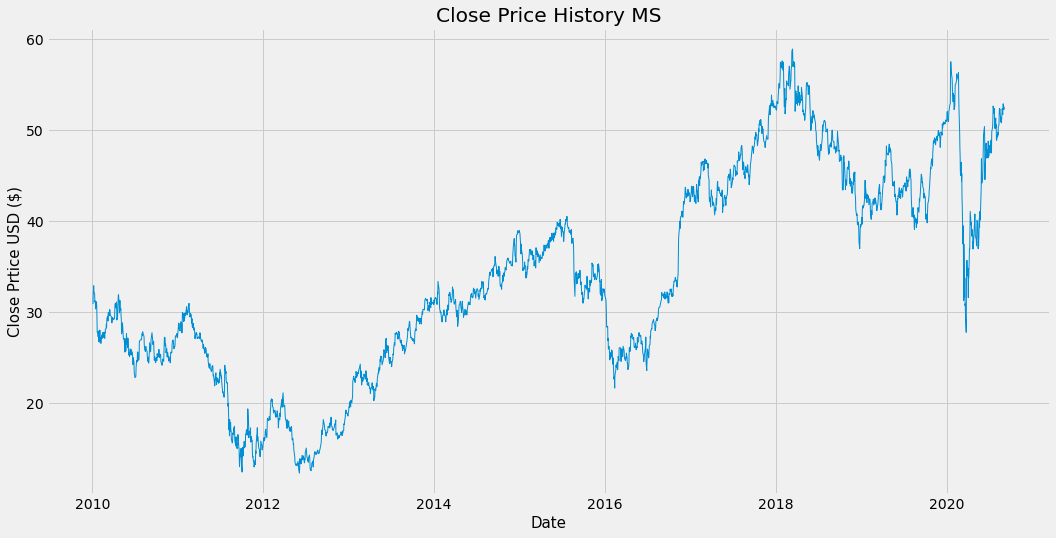

In [3]:
plt.figure(figsize=(16,8))
plt.title("Close Price History MS")
plt.plot(dfMS["Close"],linewidth=1)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)

Apple

In [4]:
dfA=web.DataReader("AAPL", data_source="yahoo", start="2010-01-01", end = "2020-09-01")
dfA.drop(["High", "Low", "Open", "Volume", "Adj Close"], axis=1, inplace=True)
dfA

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656428
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2020-08-26,126.522499
2020-08-27,125.010002
2020-08-28,124.807503


Text(0, 0.5, 'Close Prtice USD ($)')

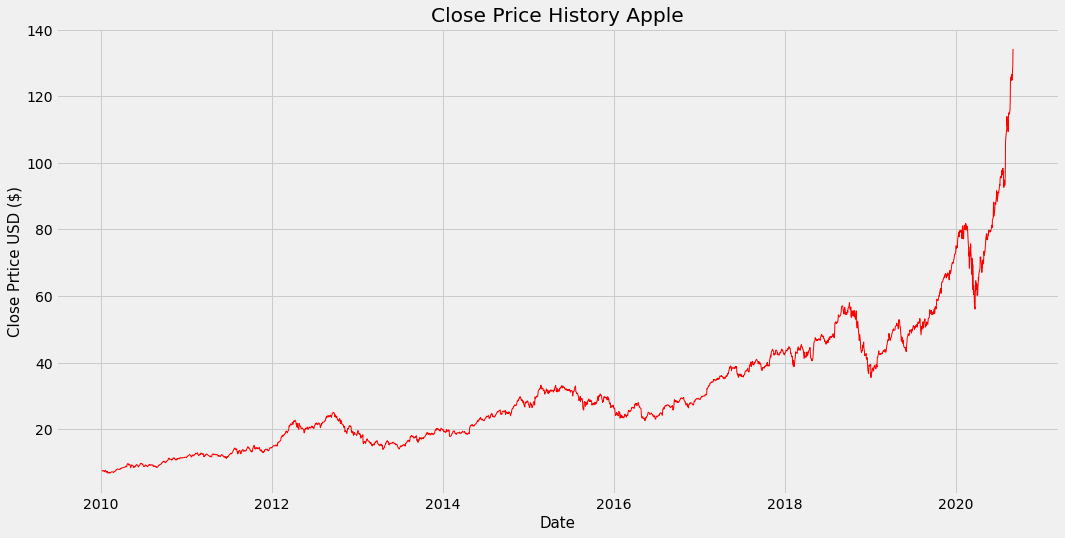

In [5]:
plt.figure(figsize=(16,8))
plt.title("Close Price History Apple")
plt.plot(dfA["Close"],linewidth=1, color="red")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)

HP

In [6]:
dfHP=web.DataReader("HP", data_source="yahoo", start="2010-01-01", end = "2020-09-01")
dfHP.drop(["High", "Low", "Open", "Volume", "Adj Close"], axis=1, inplace=True)
dfHP

,Close
Date,
2010-01-04,41.980000
2010-01-05,44.430000
2010-01-06,46.049999
2010-01-07,46.340000
2010-01-08,48.000000
...,...
2020-08-26,16.570000
2020-08-27,16.610001
2020-08-28,16.990000


Text(0, 0.5, 'Close Prtice USD ($)')

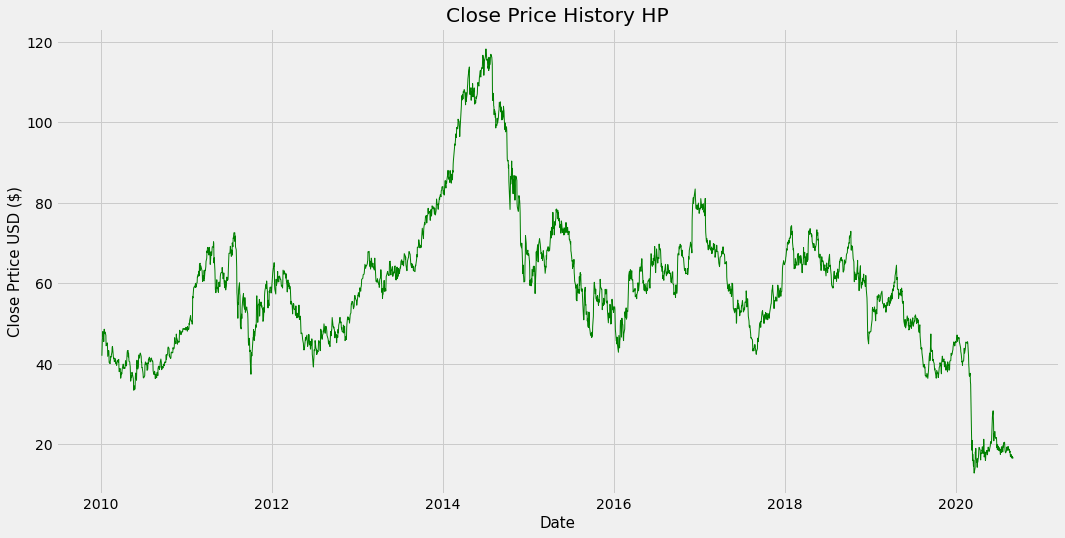

In [7]:
plt.figure(figsize=(16,8))
plt.title("Close Price History HP")
plt.plot(dfHP["Close"],linewidth=1, color="g")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)

all Data

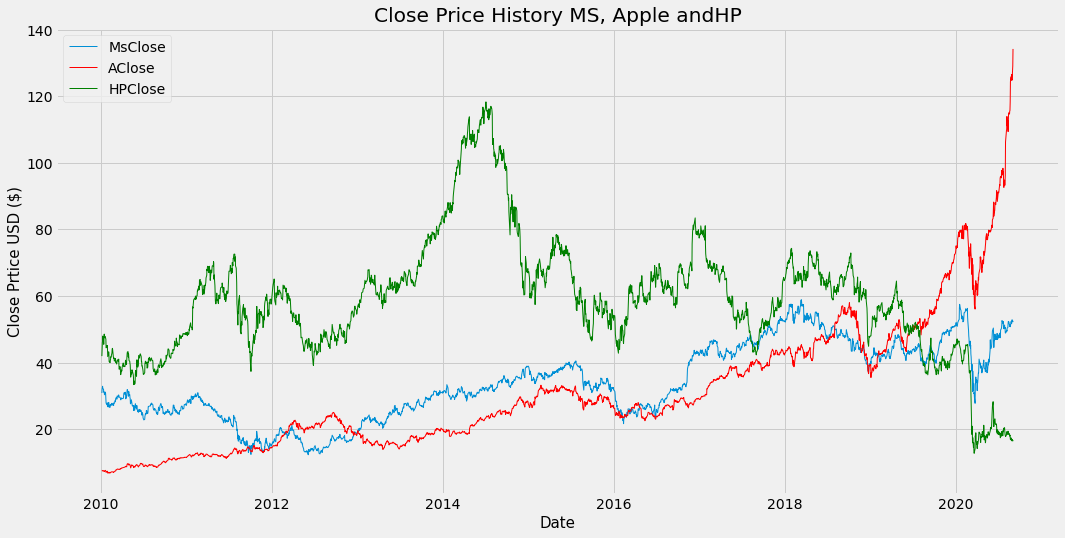

In [8]:
plt.figure(figsize=(16,8))
plt.title("Close Price History MS, Apple andHP")
plt.plot(dfMS["Close"],linewidth=1)
plt.plot(dfA["Close"],linewidth=1, color="red")
plt.plot(dfHP["Close"],linewidth=1, color="g")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsClose","AClose","HPClose"], loc="upper left")

# Methods
searching methods online and testing them.

# How to Interpret and Use Moving Averages in Trading
https://www.dummies.com/personal-finance/investing/stocks-trading/how-to-interpret-and-use-moving-averages-in-trading/

"One simple mechanical strategy that some traders employ works like this:

- Buy when the moving average slopes upward and the closing price crosses above the moving average.

- Close the position when the price closes below the moving average.

- Sell short when the moving average slopes downward and the closing price crosses below the moving average.

- Close the short position when the price closes above the moving average.
"

Notes:
- Not sure how long the SMA is(found 5 days, 30, 60...) and performance should vary if we change the lenght

Microsoft

In [9]:
dfMSSMA=dfMS.copy()

In [10]:
for i in range(30+1,dfMS.shape[0]):#SMA with 15 days
    dfMSSMA.loc[dfMSSMA.index[i],'SMA15'] = ((dfMSSMA.Close[i-15:i].sum())/15)
for i in range(30+1,dfMS.shape[0]):#SMA with 30 days
    dfMSSMA.loc[dfMSSMA.index[i],'SMA30'] = ((dfMSSMA.Close[i-30:i].sum())/30)

In [11]:
dfMSSMA

,Close,SMA15,SMA30
Date,,,
2010-01-04,30.910000,NaN,NaN
2010-01-05,32.040001,NaN,NaN
2010-01-06,32.450001,NaN,NaN
2010-01-07,32.919998,NaN,NaN
2010-01-08,32.250000,NaN,NaN
...,...,...,...
2020-08-26,51.709999,51.245333,50.992666
2020-08-27,52.610001,51.374666,51.004666
2020-08-28,52.889999,51.585333,51.003666


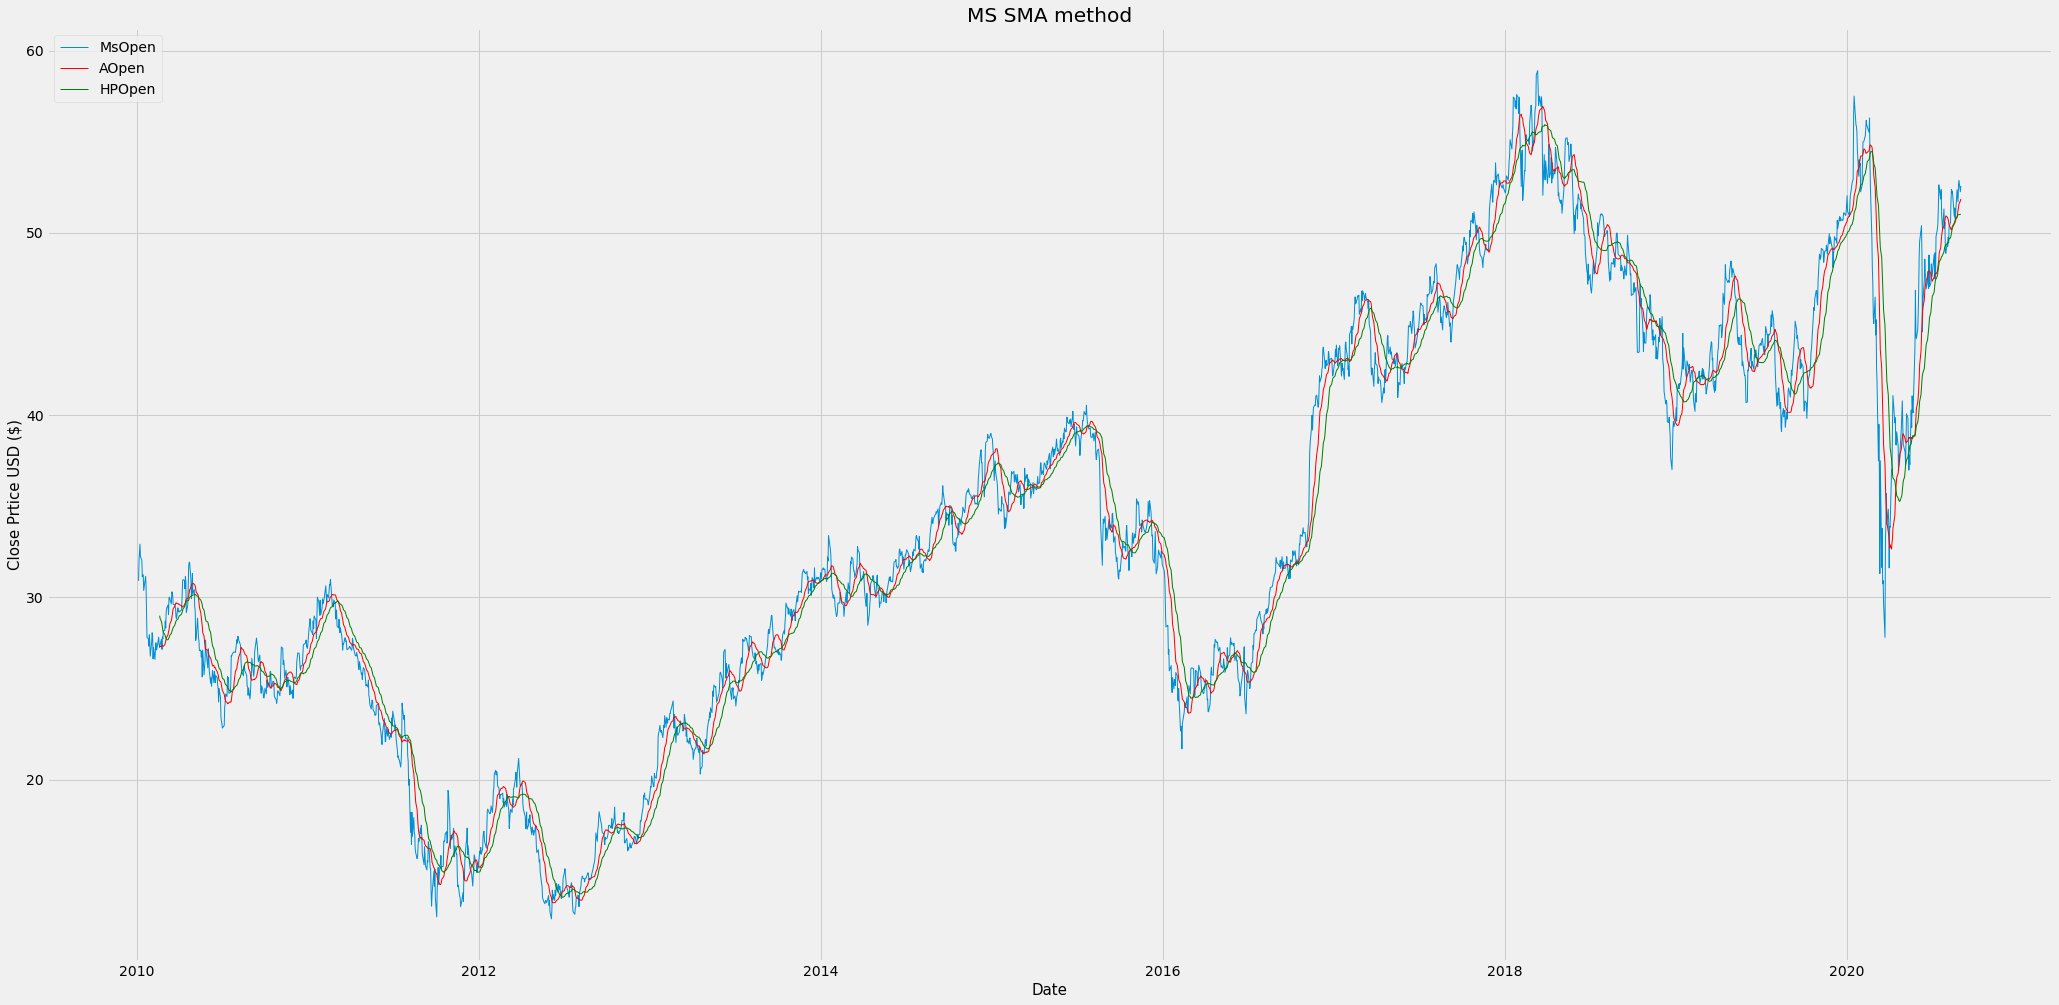

In [12]:
plt.figure(figsize=(16*2,8*2))
plt.title("MS SMA method")
plt.plot(dfMSSMA["Close"],linewidth=1)
plt.plot(dfMSSMA["SMA15"],linewidth=1, color="red")
plt.plot(dfMSSMA["SMA30"],linewidth=1, color="g")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","AOpen","HPOpen"], loc="upper left") # hard to see because it is a long timespan

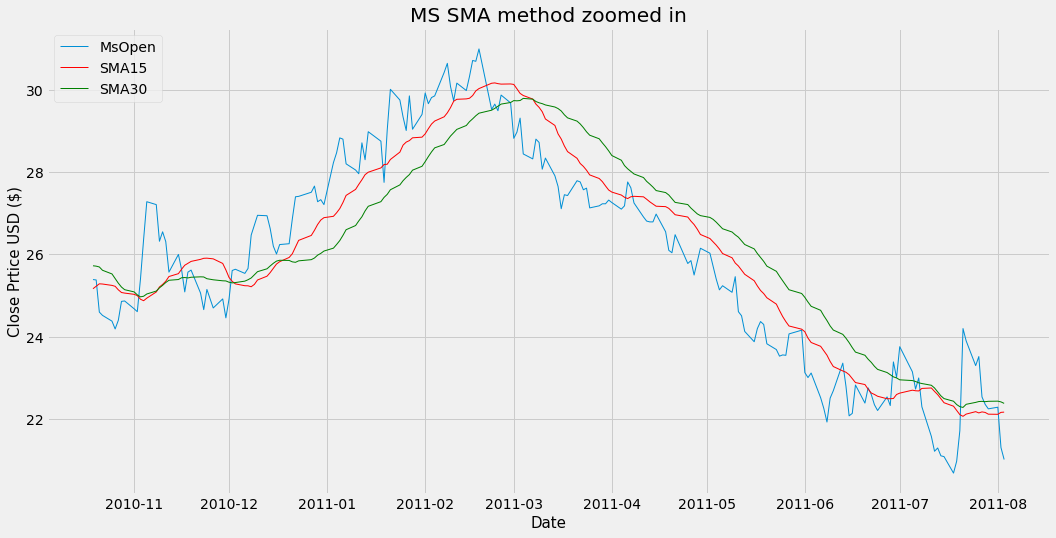

In [43]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in")
plt.plot(dfMSSMA["Close"][200:400],linewidth=1)
plt.plot(dfMSSMA["SMA15"][200:400],linewidth=1, color="red")
plt.plot(dfMSSMA["SMA30"][200:400],linewidth=1, color="g")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","SMA30"], loc="upper left") #zommed in

Both SMA seem to behave similarly, but there is still a difference

In [104]:
def SMA15BuyAlg(df):
    start=36
    buy=[]
    sell=[]
    short=[]
    buyback=[]
    for _ in range(start):
        buyback.append(np.nan)
        buy.append(np.nan)
        sell.append(np.nan)
        short.append(np.nan)
    above=None # 1 above -1 below
    for i in range(start,df.shape[0]):
        #Buy when the moving average slopes upward(decided arbitrarily 5 days as info not clear) and the closing price crosses above the moving average.
        if (df.SMA15[i]>df.SMA15[i-1]>df.SMA15[i-2]>df.SMA15[i-3]>df.SMA15[i-4] 
            and above!=1 and df.SMA15[i]>df.Close[i]):
                buy.append(df.Close[i])
                sell.append(np.nan)
                short.append(np.nan)
                buyback.append(np.nan)
                above=1
                
        #Close the position when the price closes below the moving average.        
        elif (above==1 and df.SMA15[i]>df.Close[i]):
            sell.append(df.Close[i])
            buy.append(np.nan)
            short.append(np.nan)
            buyback.append(np.nan)
            above=0
            
        #Sell short when the moving average slopes downward and the closing price crosses below the moving average.
        elif (df.SMA15[i]<df.SMA15[i-1]<df.SMA15[i-2]<df.SMA15[i-3]<df.SMA15[i-4] 
            and above!=-1 and df.SMA15[i]<df.Close[i]):
                short.append(df.Close[i])
                buy.append(np.nan)
                sell.append(np.nan)
                buyback.append(np.nan)
                above=-1
        #Close the short position when the price closes above the moving average.
        elif (above==-1 and df.SMA15[i]<df.Close[i]):
            buyback.append(df.Close[i])
            buy.append(np.nan)
            sell.append(np.nan)
            short.append(np.nan)
            above=0
        #do nothing
        else:
            buyback.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            short.append(np.nan)
        
    
    return buy, sell, short, buyback

In [105]:
MSSMA15Buy, MSSMA15Sell, MSSMA15Short, MSSMA15Buyback=SMA15BuyAlg(dfMSSMA)

In [106]:
dfMSSMA["15Buy"]=MSSMA15Buy
dfMSSMA["15Sell"]=MSSMA15Sell
dfMSSMA["15Short"]=MSSMA15Short
dfMSSMA["15Buyback"]=MSSMA15Buyback
dfMSSMA

,Close,SMA15,SMA30,15Buy,15Sell,15Short,15Buyback
Date,,,,,,,
2010-01-04,30.910000,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,32.040001,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,32.450001,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,32.919998,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,32.250000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-08-26,51.709999,51.245333,50.992666,NaN,NaN,NaN,NaN
2020-08-27,52.610001,51.374666,51.004666,NaN,NaN,NaN,NaN
2020-08-28,52.889999,51.585333,51.003666,NaN,NaN,NaN,NaN


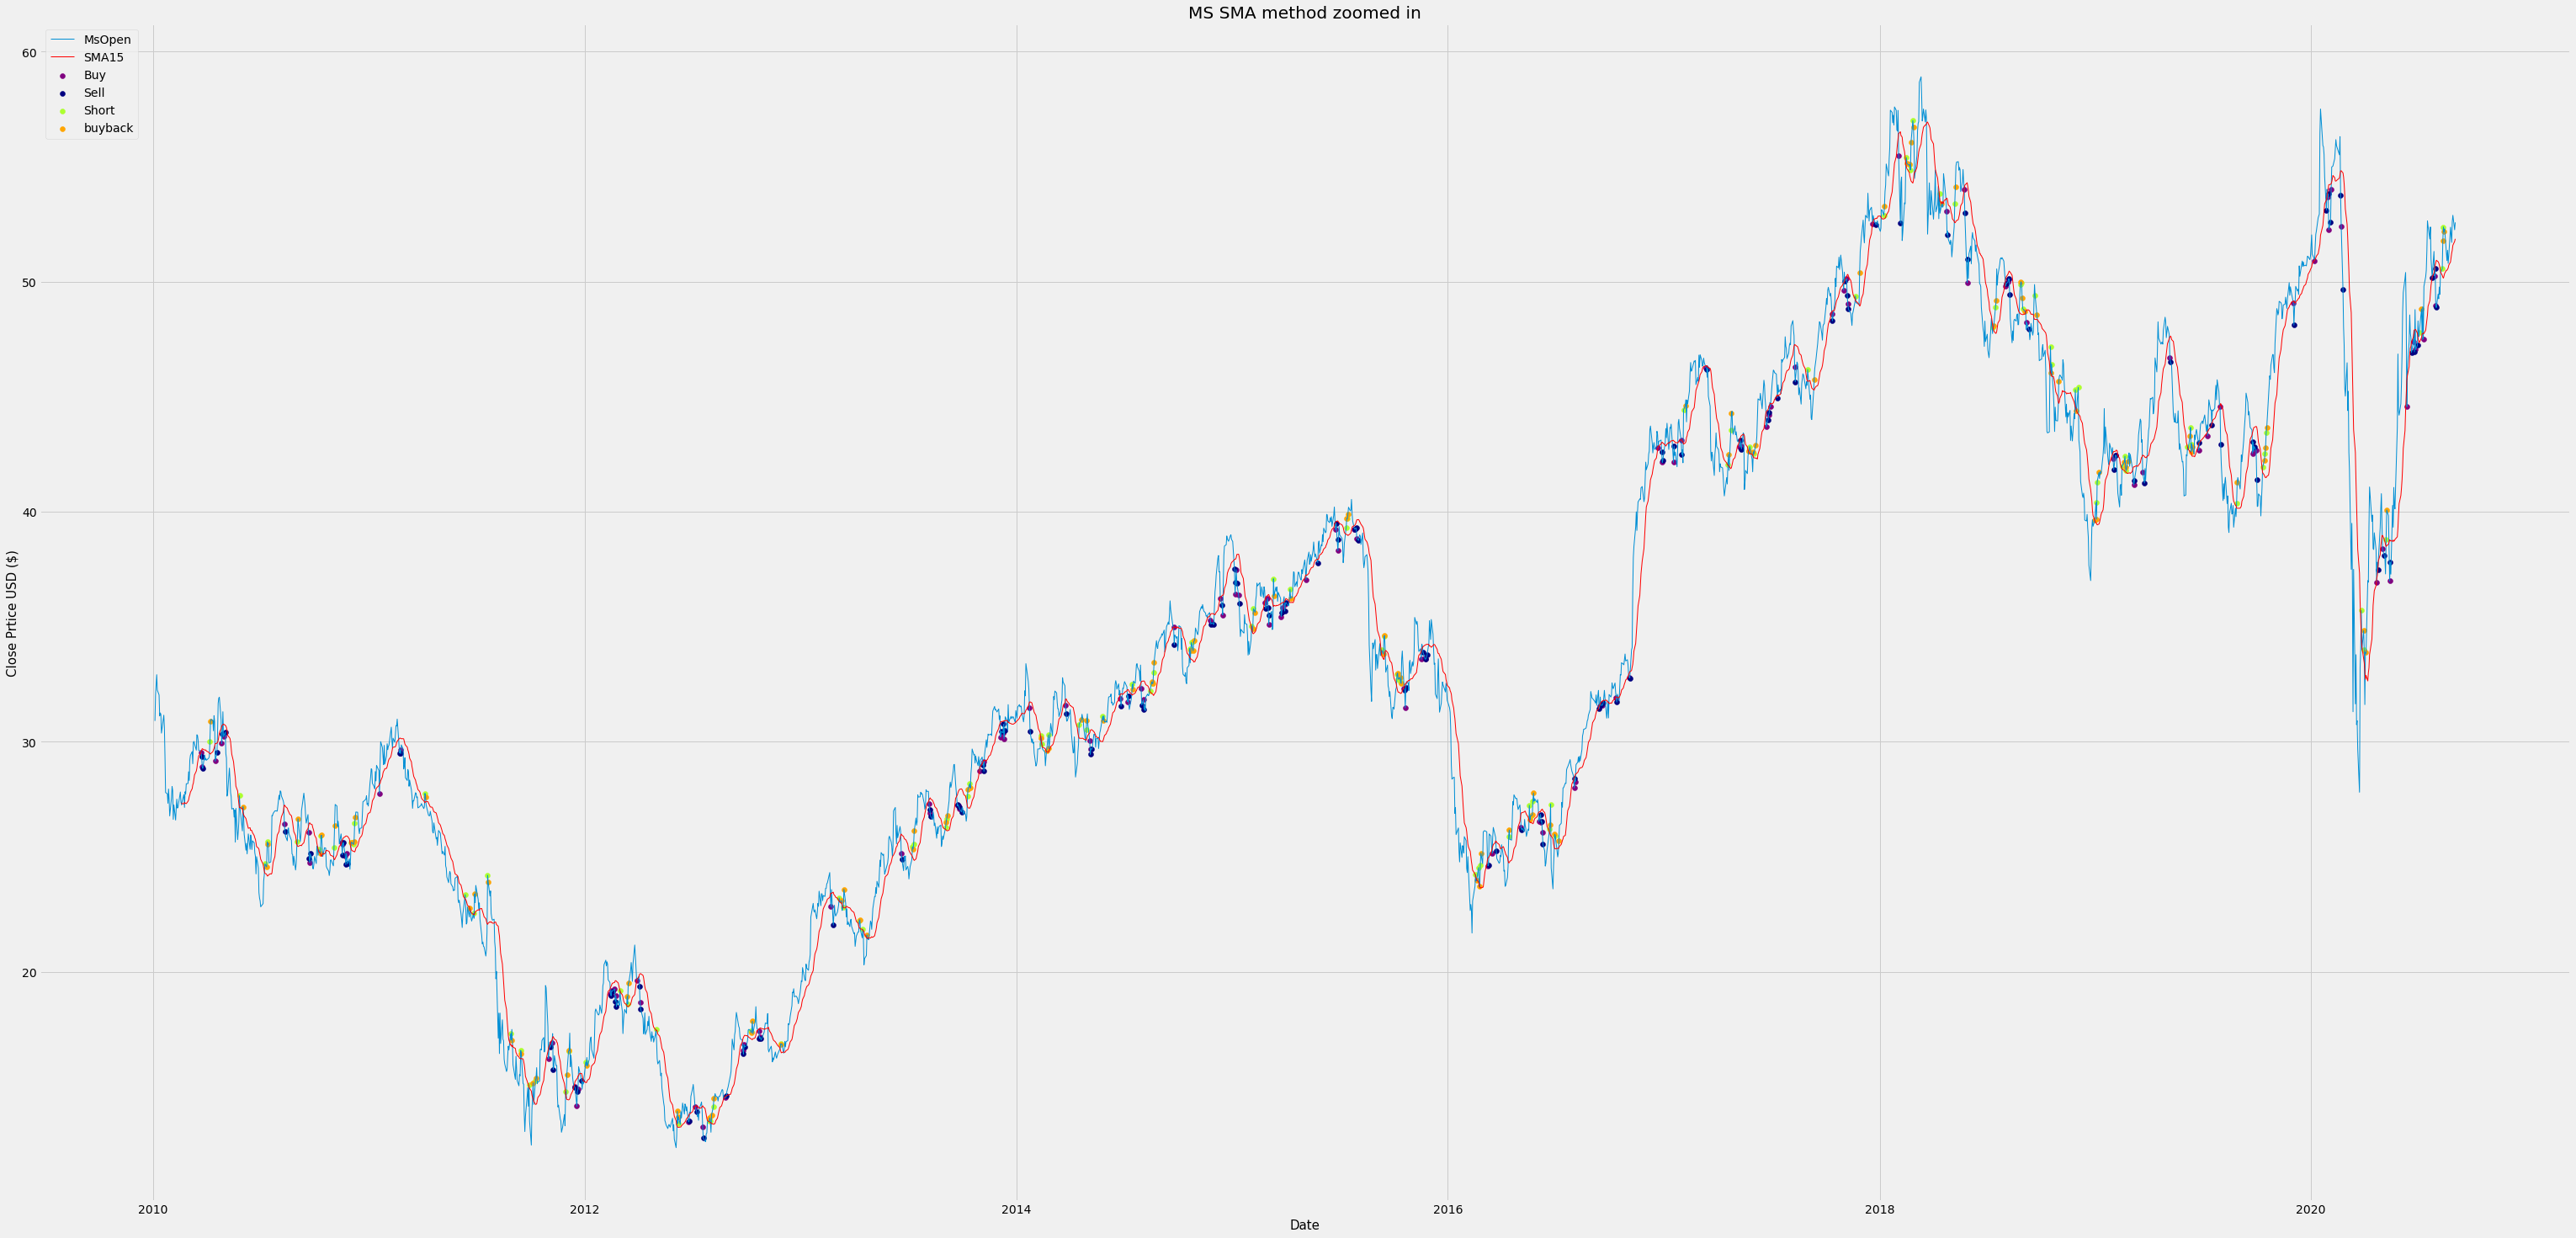

In [116]:
plt.figure(figsize=(16*3,8*3))
plt.title("MS SMA method")

plt.plot(dfMSSMA["Close"],linewidth=1)
plt.plot(dfMSSMA["SMA15"],linewidth=1, color="red")

plt.scatter(dfMSSMA.index,dfMSSMA["15Buy"], color="purple")
plt.scatter(dfMSSMA.index,dfMSSMA["15Sell"], color="navy")
plt.scatter(dfMSSMA.index,dfMSSMA["15Short"], color="greenyellow")
plt.scatter(dfMSSMA.index,dfMSSMA["15Buyback"], color="orange")

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

it's impossible to see stuff, so i will make smaller plots to analyze

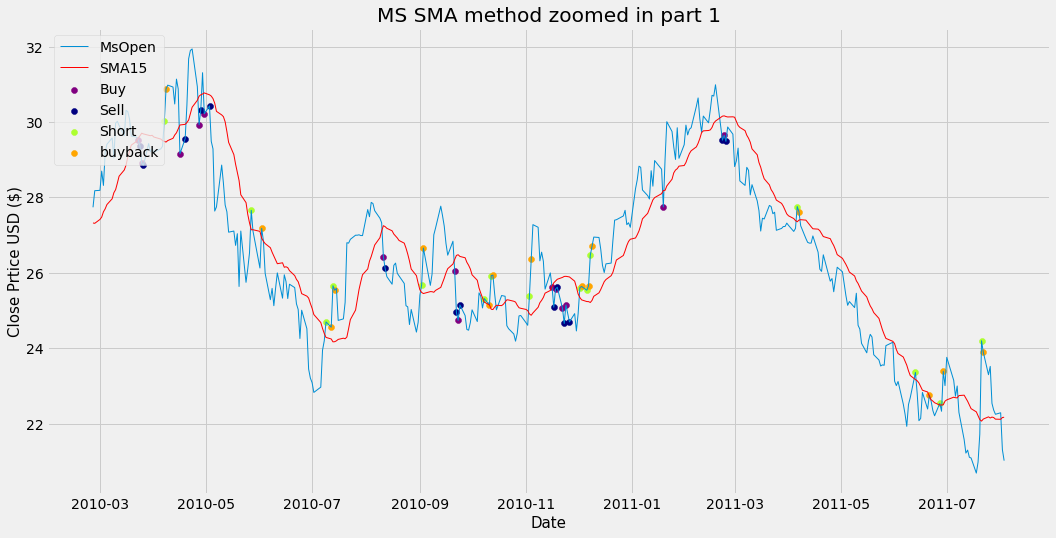

In [122]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in part 1")

plt.plot(dfMSSMA["Close"][36:400],linewidth=1)
plt.plot(dfMSSMA["SMA15"][36:400],linewidth=1, color="red")

plt.scatter(dfMSSMA.index[36:400],dfMSSMA["15Buy"][36:400], color="purple",linewidth=1)
plt.scatter(dfMSSMA.index[36:400],dfMSSMA["15Sell"][36:400], color="navy",linewidth=1)
plt.scatter(dfMSSMA.index[36:400],dfMSSMA["15Short"][36:400], color="greenyellow",linewidth=1)
plt.scatter(dfMSSMA.index[36:400],dfMSSMA["15Buyback"][36:400], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

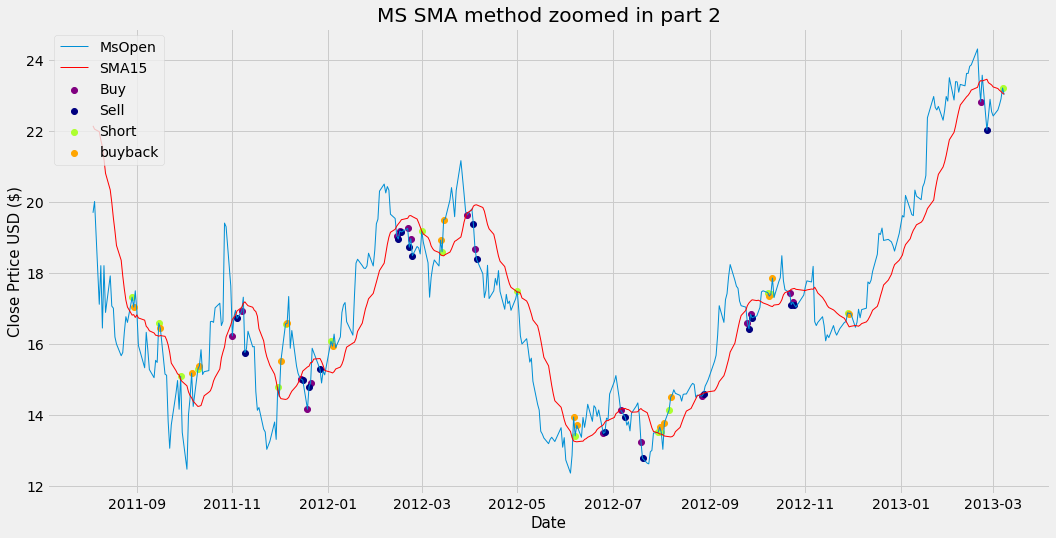

In [124]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in part 2")

plt.plot(dfMSSMA["Close"][400:800],linewidth=1)
plt.plot(dfMSSMA["SMA15"][400:800],linewidth=1, color="red")

plt.scatter(dfMSSMA.index[400:800],dfMSSMA["15Buy"][400:800], color="purple",linewidth=1)
plt.scatter(dfMSSMA.index[400:800],dfMSSMA["15Sell"][400:800], color="navy",linewidth=1)
plt.scatter(dfMSSMA.index[400:800],dfMSSMA["15Short"][400:800], color="greenyellow",linewidth=1)
plt.scatter(dfMSSMA.index[400:800],dfMSSMA["15Buyback"][400:800], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

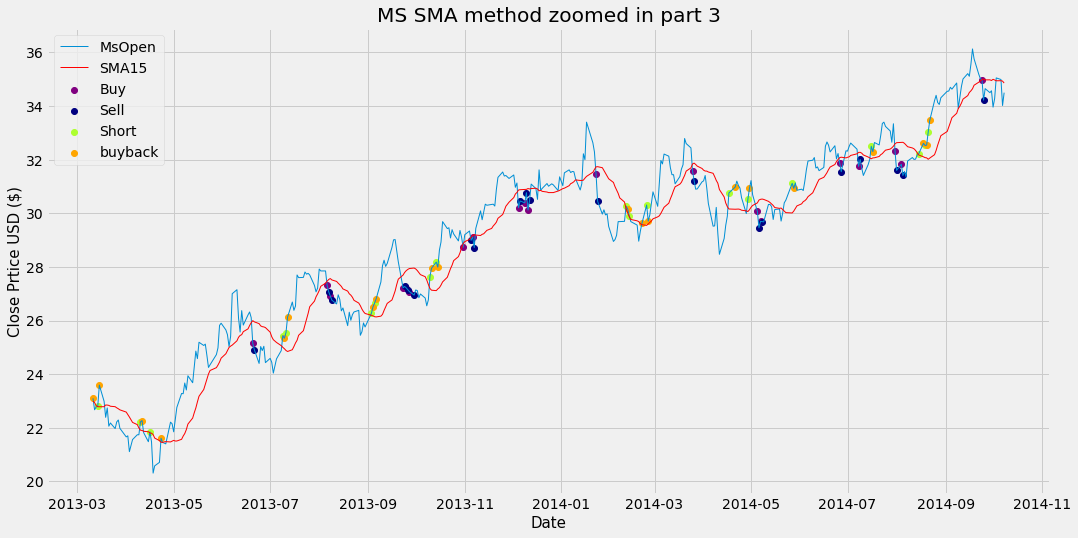

In [126]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in part 3")

plt.plot(dfMSSMA["Close"][800:1200],linewidth=1)
plt.plot(dfMSSMA["SMA15"][800:1200],linewidth=1, color="red")

plt.scatter(dfMSSMA.index[800:1200],dfMSSMA["15Buy"][800:1200], color="purple",linewidth=1)
plt.scatter(dfMSSMA.index[800:1200],dfMSSMA["15Sell"][800:1200], color="navy",linewidth=1)
plt.scatter(dfMSSMA.index[800:1200],dfMSSMA["15Short"][800:1200], color="greenyellow",linewidth=1)
plt.scatter(dfMSSMA.index[800:1200],dfMSSMA["15Buyback"][800:1200], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

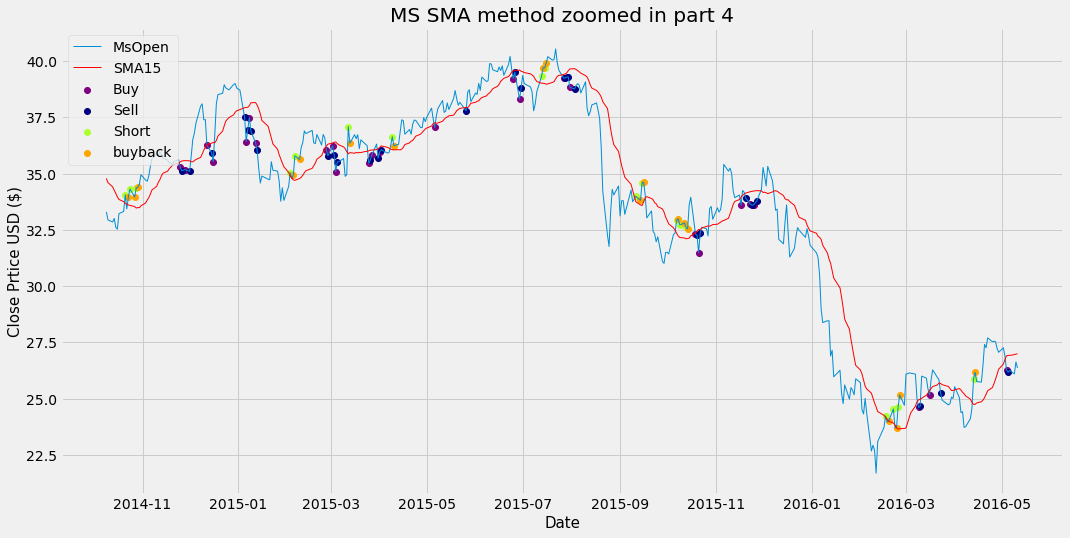

In [127]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in part 4")

plt.plot(dfMSSMA["Close"][1200:1600],linewidth=1)
plt.plot(dfMSSMA["SMA15"][1200:1600],linewidth=1, color="red")

plt.scatter(dfMSSMA.index[1200:1600],dfMSSMA["15Buy"][1200:1600], color="purple",linewidth=1)
plt.scatter(dfMSSMA.index[1200:1600],dfMSSMA["15Sell"][1200:1600], color="navy",linewidth=1)
plt.scatter(dfMSSMA.index[1200:1600],dfMSSMA["15Short"][1200:1600], color="greenyellow",linewidth=1)
plt.scatter(dfMSSMA.index[1200:1600],dfMSSMA["15Buyback"][1200:1600], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

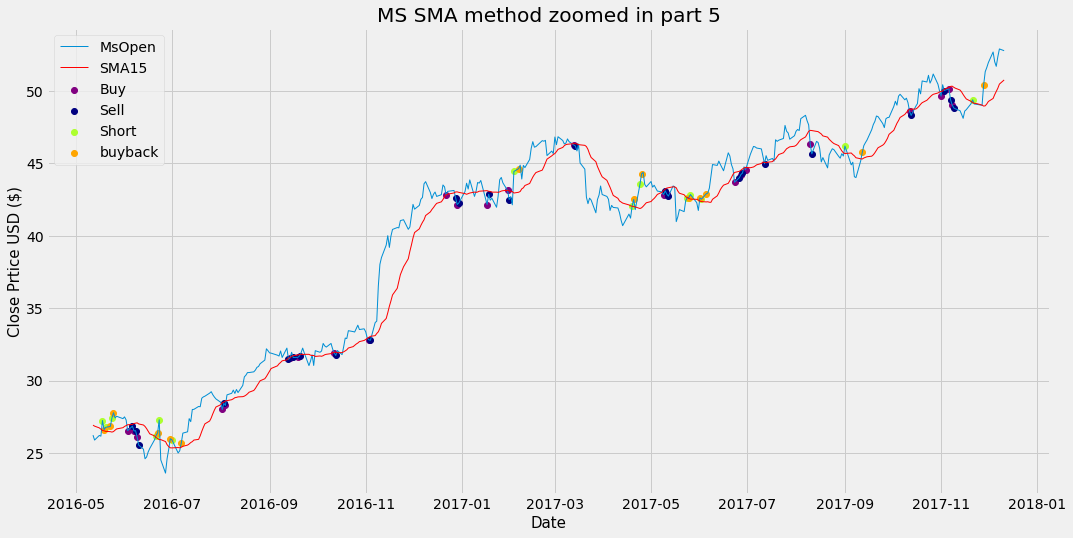

In [128]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in part 5")

plt.plot(dfMSSMA["Close"][1600:2000],linewidth=1)
plt.plot(dfMSSMA["SMA15"][1600:2000],linewidth=1, color="red")

plt.scatter(dfMSSMA.index[1600:2000],dfMSSMA["15Buy"][1600:2000], color="purple",linewidth=1)
plt.scatter(dfMSSMA.index[1600:2000],dfMSSMA["15Sell"][1600:2000], color="navy",linewidth=1)
plt.scatter(dfMSSMA.index[1600:2000],dfMSSMA["15Short"][1600:2000], color="greenyellow",linewidth=1)
plt.scatter(dfMSSMA.index[1600:2000],dfMSSMA["15Buyback"][1600:2000], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")

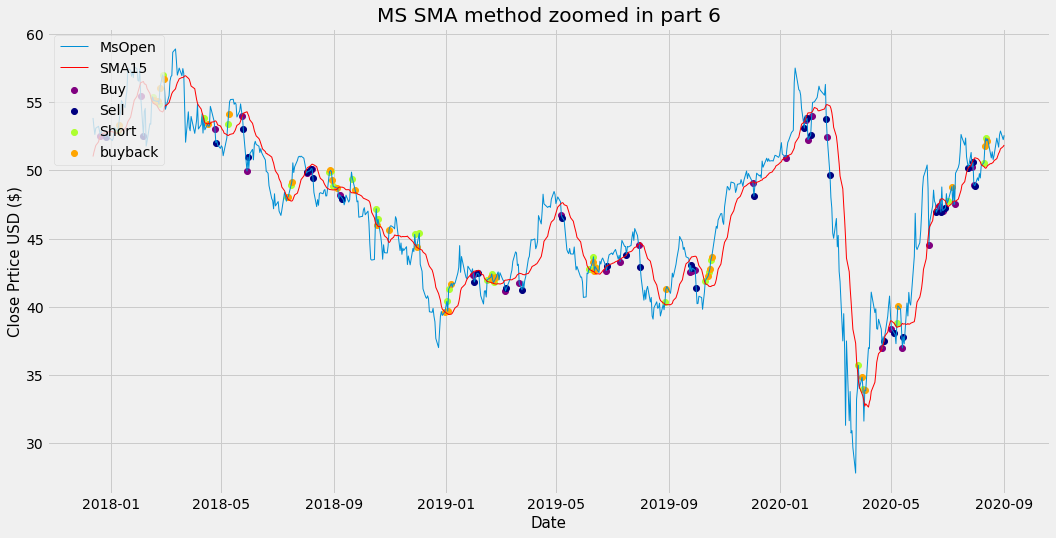

In [129]:
plt.figure(figsize=(16,8))
plt.title("MS SMA method zoomed in part 6")

plt.plot(dfMSSMA["Close"][2000:],linewidth=1)
plt.plot(dfMSSMA["SMA15"][2000:],linewidth=1, color="red")

plt.scatter(dfMSSMA.index[2000:],dfMSSMA["15Buy"][2000:], color="purple",linewidth=1)
plt.scatter(dfMSSMA.index[2000:],dfMSSMA["15Sell"][2000:], color="navy",linewidth=1)
plt.scatter(dfMSSMA.index[2000:],dfMSSMA["15Short"][2000:], color="greenyellow",linewidth=1)
plt.scatter(dfMSSMA.index[2000:],dfMSSMA["15Buyback"][2000:], color="orange",linewidth=1)

plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Prtice USD ($)", fontsize=15)
plt.legend(["MsOpen","SMA15","Buy", "Sell", "Short", "buyback"], loc="upper left")